# Are Airbnb Hosting Prices affected by Neighbourhood Crime?

### In this notebook, we'll walk through the basics of exploring your data including: 
- importing data
- understanding data
- transforming data
- visualising data

First things first, we'll import the python libraries we'll need:

Data used.

The data used in this kernel was provided by a company called Count, they run a ref: OpendataHackathon in London.


In [218]:
import pandas as pd             # data maniuplation
import numpy as np              # numerical libraries
import os                       # operating-system specifics
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # fancy stylesheet over matplotlib
plt.style.use(['seaborn','dark_background'])

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

... and list the `.csv` files we have access to in the `Data` folder. The [os library](https://docs.python.org/3/library/os.html) allows you standardize the way you go through your file directory so it won't matter if you're on a mac or a PC.

In [219]:
path = os.path.join("../Data")
[f for f in os.listdir(path) if f.endswith(".csv")]

['Calendar.csv',
 'Hosts.csv',
 'HousePrices.csv',
 'Listings.csv',
 'Reviews.csv',
 'SAF_Crimes_08-17.csv']

## Getting to grips with the data

To get a feel for what's in a dataframe, use the `head()` function, e.g.

In [362]:
#listings = pd.read_csv(os.path.join(path,"Listings.csv"))
#housePrices = pd.read_csv(os.path.join(path,"HousePrices.csv"))
#hosts = pd.read_csv(os.path.join(path,"Hosts.csv"))
#calendar = pd.read_csv(os.path.join(path,"Calendar.csv"))
#reviews = pd.read_csv(os.path.join(path,"Reviews.csv"))
crimedata= pd.read_csv(os.path.join(path,'SAF_Crimes_08-17.csv'))

In [366]:
crimedata['Borough'].value_counts()

Southwark                 88
Hillingdon                88
Westminster               88
Richmond upon Thames      88
Tower Hamlets             88
Hackney                   88
Camden                    88
Bromley                   88
Harrow                    88
Barking and Dagenham      88
Enfield                   88
Hammersmith and Fulham    88
Wandsworth                88
Barnet                    88
Lambeth                   88
Sutton                    88
Haringey                  88
Hounslow                  88
Islington                 88
Havering                  88
Merton                    88
Kingston upon Thames      88
Bexley                    88
Lewisham                  88
Brent                     88
Kensington and Chelsea    88
Redbridge                 88
Croydon                   88
Ealing                    88
Waltham Forest            88
Greenwich                 88
Newham                    88
City of London            63
Name: Borough, dtype: int64

In [393]:
crimedata.head()

,Unnamed: 0,Year,Borough,Major Category,Number of Crimes,Area code,Population,Crimes per 1000 people,YoY Change
0,0,2008,Barking and Dagenham,Burglary,1764,E09000002,172452.0,10.23,0.0
1,1,2008,Barking and Dagenham,Criminal Damage,2934,E09000002,172452.0,17.01,0.0
2,2,2008,Barking and Dagenham,Drugs,1467,E09000002,172452.0,8.51,0.0
3,3,2008,Barking and Dagenham,Fraud or Forgery,205,E09000002,172452.0,1.19,0.0
4,4,2008,Barking and Dagenham,Other Notifiable Offences,253,E09000002,172452.0,1.47,0.0


In [221]:
print('Listings Shape :', listings.shape)
print('housePrices :', housePrices.shape)
print('hosts :', hosts.shape)
print('calendar:', calendar.shape)
print('reviews :', reviews.shape) 

Listings Shape : (103546, 36)
housePrices : (891, 14)
hosts : (63544, 13)
calendar: (1853374, 6)
reviews : (617805, 6)


To get some summary statistics about each of the columns in the dataframe, use the `describe()` function.

In [222]:
listings.describe()

,id,host id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minNights,maxNights,reviewCount,review rating,review accuracy,review cleanliness,review checkin,review communication,review location,review value,guests included
count,1.035460e+05,1.035460e+05,103546.000000,103546.000000,103546.000000,103332.000000,103480.000000,103376.000000,103546.000000,1.035460e+05,103546.000000,73882.000000,73785.000000,73813.000000,73698.000000,73787.000000,73690.000000,73684.000000,103546.000000
mean,1.860240e+07,6.811356e+07,51.509675,-0.127843,3.180557,1.286523,1.397198,1.747688,3.758272,5.834671e+04,14.560823,92.270864,9.471871,9.239064,9.602092,9.638961,9.461759,9.246458,1.553290
std,8.733189e+06,6.732846e+07,0.045636,0.091573,2.002515,0.601339,0.915355,1.260421,13.606510,1.007425e+07,31.232065,10.454360,1.017013,1.168182,0.932985,0.911308,0.875098,1.055188,1.270976
min,9.554000e+03,5.160000e+02,51.289812,-0.509800,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,1.251873e+07,1.310693e+07,51.486150,-0.187520,2.000000,1.000000,1.000000,1.000000,1.000000,3.100000e+01,0.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,1.000000
50%,1.993665e+07,4.016090e+07,51.513804,-0.125415,2.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,3.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000
75%,2.484513e+07,1.162400e+08,51.536790,-0.070150,4.000000,1.500000,2.000000,2.000000,3.000000,1.125000e+03,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
max,3.288463e+07,2.473889e+08,51.686817,0.317520,16.000000,17.000000,44.000000,23.000000,1125.000000,2.147484e+09,614.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,24.000000


In [223]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103546 entries, 0 to 103545
Data columns (total 36 columns):
id                          103546 non-null int64
last scraped                103546 non-null object
listing url                 103546 non-null object
name                        103508 non-null object
host id                     103546 non-null int64
experiences                 103546 non-null object
neighbourhood               103546 non-null object
latitude                    103546 non-null float64
longitude                   103546 non-null float64
property type               103546 non-null object
room type                   103546 non-null object
accommodates                103546 non-null int64
bathrooms                   103332 non-null float64
bedrooms                    103480 non-null float64
beds                        103376 non-null float64
bed type                    103546 non-null object
minNights                   103546 non-null int64
maxNights            

A common pitfall when first using `pandas` arises from the column typings. Python is a dynamically-typed language, which means you often don't explictly see the type of a variable you are working with. Note that it is still strongly-typed though:

Although the types aren't specified by the user, they are inferred by the language runtime and their behaviour is dictated accordingly. Contrast this to dynamic and *weakly-typed* languages like javascript, which will happily allow the addition of numbers and strings.

To get the data types (`dtypes`) of your columns, use the `dtypes` property of a dataframe:

In [224]:
listings.dtypes

id                            int64
last scraped                 object
listing url                  object
name                         object
host id                       int64
experiences                  object
neighbourhood                object
latitude                    float64
longitude                   float64
property type                object
room type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed type                     object
minNights                     int64
maxNights                     int64
reviewCount                   int64
instant bookable             object
is business travel ready     object
cancellation policy          object
first review                 object
last review                  object
review rating               float64
review accuracy             float64
review cleanliness          float64
review checkin              

You can read more about `dtypes` [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes), the main thing to note is that `object` is potentially bad. Pandas uses `object` for string columns, which is fine for columns like `name`, but bad for columns which we expect to have stricter types, like the datetime columns `last scraped`, `first review` etc.

In this case, we need to explicitly tell pandas that these columns represent dates:

In [225]:
# Preparing data format 
listings['last scraped'] = pd.to_datetime(listings['last scraped'])
listings['first review'] = pd.to_datetime(listings['first review'])
listings['last review']  = pd.to_datetime(listings['last review'])

In [226]:
# Prep data objects.
# All prices came in string form we have to seperate the dollar sign from the digits, we do this so that we can perform calculations with the  digits.
# Columns with price/ currency
# Price
# Cleaning fee
# Deposit fee

listings['price'] =listings['price'].str.replace('[$,]',"").astype(float)
listings['cleaning fee'] = listings['cleaning fee'].str.replace('$',"").astype(float)
listings['security deposit'] = listings['security deposit'].str.replace('[$,]',"").astype(float)
listings['extra people'] = listings['extra people'].str.replace('[$,]',"").astype(float)

In [227]:
listings.columns

Index(['id', 'last scraped', 'listing url', 'name', 'host id', 'experiences',
       'neighbourhood', 'latitude', 'longitude', 'property type', 'room type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed type',
       'minNights', 'maxNights', 'reviewCount', 'instant bookable',
       'is business travel ready', 'cancellation policy', 'first review',
       'last review', 'review rating', 'review accuracy', 'review cleanliness',
       'review checkin', 'review communication', 'review location',
       'review value', 'price', 'security deposit', 'cleaning fee',
       'guests included', 'extra people', 'cleaning_fee'],
      dtype='object')

In [228]:
 listings = listings.drop(columns = [ 'cleaning fee'])

In [229]:
Tempdf = listings[['id','last scraped', 'first review', 'last review']]
Tempdf.head()

,id,last scraped,first review,last review
0,9554,2018-04-08,2012-04-26,2018-02-04
1,11076,2018-04-08,2016-04-05,2016-11-23
2,11417,2018-04-08,2016-07-06,2018-01-31
3,13913,2019-03-08,2010-08-18,2018-06-17
4,15400,2019-03-08,2009-12-21,2018-03-30


In [375]:
crimedata.isnull().sum()/len(crimedata)*100

Unnamed: 0                0.0
Year                      0.0
Borough                   0.0
Major Category            0.0
Number of Crimes          0.0
Area code                 0.0
Population                0.0
Crimes per 1000 people    0.0
YoY Change                0.0
dtype: float64

In [230]:
listings.dtypes

id                                   int64
last scraped                datetime64[ns]
listing url                         object
name                                object
host id                              int64
experiences                         object
neighbourhood                       object
latitude                           float64
longitude                          float64
property type                       object
room type                           object
accommodates                         int64
bathrooms                          float64
bedrooms                           float64
beds                               float64
bed type                            object
minNights                            int64
maxNights                            int64
reviewCount                          int64
instant bookable                    object
is business travel ready            object
cancellation policy                 object
first review                datetime64[ns]
last review

Typings are one place where the data can act like you don't expect, another part of the cleaning process is checking for null values.

Pandas provides a function `isnull()`, which creates a new dataframe full of `True / False` if each cell is null or not, e.g.

In [231]:
#check for nulls 

Taking the sum of these columns (where `True == 1` and `False == 0`) gives us the total number of null values in each column:

In [232]:
# Percent null values
listings.isnull().sum() / len(listings) * 100

id                           0.000000
last scraped                 0.000000
listing url                  0.000000
name                         0.036699
host id                      0.000000
experiences                  0.000000
neighbourhood                0.000000
latitude                     0.000000
longitude                    0.000000
property type                0.000000
room type                    0.000000
accommodates                 0.000000
bathrooms                    0.206671
bedrooms                     0.063740
beds                         0.164178
bed type                     0.000000
minNights                    0.000000
maxNights                    0.000000
reviewCount                  0.000000
instant bookable             0.000000
is business travel ready     0.000000
cancellation policy          0.000000
first review                26.504162
last review                 26.486779
review rating               28.648137
review accuracy             28.741815
review clean

## OK - let's try some more interesting questions...

### 1. How many listings are there per neighbourhood?

In the first line we group all listings by their neighbourhood, then count how many unique `id`s are in each and divide by the number of listings.
In the second line we sort the listings and create a bar plot.

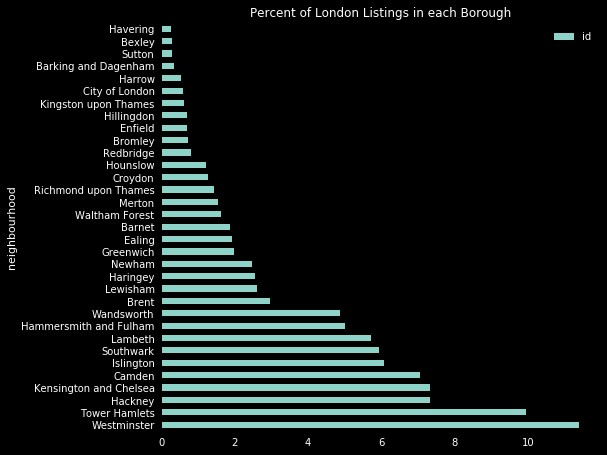

In [233]:
byNeighbourhood = listings.groupby('neighbourhood').agg({ 'id': len }) / len(listings) * 100
byNeighbourhood.sort_values(by = 'id', ascending = False).plot(kind = 'barh', figsize=(7,7))
plt.title("Percent of London Listings in each Borough")
plt.grid(False)
plt.show()

In [ ]:
byNeighbourhood = listings.groupby('neighbourhood')['price']

byNeighbourhood = listings.groupby('neighbourhood')['price']
#.agg({ 'id': len }) / len(listings) * 100
byNeighbourhood.plot(kind = 'barh', figsize=(7,7))
plt.title("Percent of London Listings in each Borough")
plt.grid(False)
plt.show()

### How has the overall number of listings in London changed over time

Since we don't have the actual date the listing was first put up, we can use "first review" as a proxy for when it first showed up.

In [234]:
#listings['price_$']
#~~listings.price

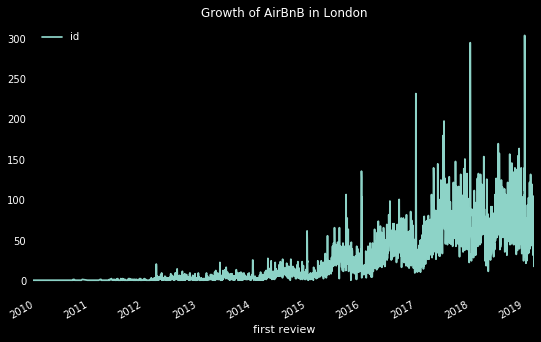

In [235]:
listings.groupby([listings['first review']]).agg({ 'id': len }).plot()
plt.title("Growth of AirBnB in London")
plt.grid()
plt.show()

In [377]:
listings.columns

Index(['id', 'last scraped', 'listing url', 'name', 'host id', 'experiences',
       'neighbourhood', 'latitude', 'longitude', 'property type', 'room type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed type',
       'minNights', 'maxNights', 'reviewCount', 'instant bookable',
       'is business travel ready', 'cancellation policy', 'first review',
       'last review', 'review rating', 'review accuracy', 'review cleanliness',
       'review checkin', 'review communication', 'review location',
       'review value', 'price', 'security deposit', 'guests included',
       'extra people', 'cleaning_fee'],
      dtype='object')

## Challenge: Which neighbourhood has experienced the highest YoY growth from 2018-2019?

In [385]:

#listings.groupby('neighbourhood').agg({''})
#listings['pct'] = listings.sort_values('first review').groupby(['neighbourhood']).transform(lambda x: x.pct_change())
#yoy = df[['Area name','Year','Median House Price (GBP)']]
#yoy = yoy[yoy['Median House Price (GBP)'].isnull()==False]
yoy_piv = listings.pivot_table(index = listings['first review'].dt.year,columns = 'neighbourhood',values = 'price')
changes = yoy_piv.pct_change().reset_index()
#changes.head()
changes['ave_change'] = changes.iloc[:,1::].mean(axis=1)
changes_melt = pd.melt(changes, id_vars ='first review',value_vars = changes.columns[1:-1],value_name = 'YoY Change',var_name = 'neighbourhood')

In [392]:
changes_melt

,first review,neighbourhood,YoY Change
0,2009.0,Barking and Dagenham,NaN
1,2010.0,Barking and Dagenham,NaN
2,2011.0,Barking and Dagenham,NaN
3,2012.0,Barking and Dagenham,-0.128205
4,2013.0,Barking and Dagenham,-0.529412
5,2014.0,Barking and Dagenham,2.234375
6,2015.0,Barking and Dagenham,-0.067633
7,2016.0,Barking and Dagenham,-0.037341
8,2017.0,Barking and Dagenham,0.109588
9,2018.0,Barking and Dagenham,0.090205


# Most Expensive Neighbourhood

In [378]:
listings.pivot_table(index=listings['neighbourhood'], values=['price'], aggfunc=['mean','median','max',len ])

,mean,median,max,len
,price,price,price,price
neighbourhood,,,,
Barking and Dagenham,61.378299,40.0,746.0,341.0
Barnet,77.362643,50.0,6200.0,1922.0
Bexley,55.594059,40.0,500.0,303.0
Brent,82.472686,59.0,1200.0,3057.0
Bromley,63.102497,50.0,750.0,761.0
Camden,133.806782,100.0,7000.0,7313.0
City of London,161.786645,140.5,1100.0,614.0
Croydon,58.703506,42.0,850.0,1312.0


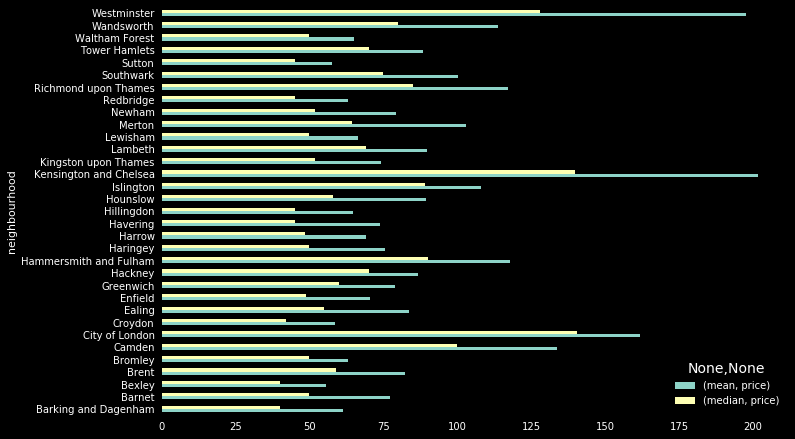

In [261]:

listings.pivot_table(index=['neighbourhood'], values=['price'], aggfunc=['mean','median']).plot(kind='barh', figsize=(10,7))
plt.grid(False)

#### House price distribution accross London 

Text(0.5,1,'AIR_BNB HOUSE PRICE DISTRIBUTION ACROSS LONDON')

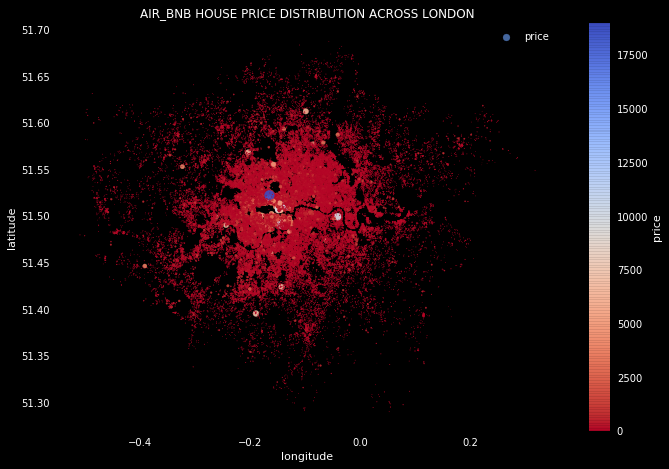

In [265]:
listings.plot(kind='scatter', x= 'longitude', y= 'latitude', alpha=0.9,
            s=listings['price']/200, label='price',c='price',cmap=plt.get_cmap('coolwarm_r'), colorbar=True, figsize=(10,7))
plt.grid(False)
#plt.style.use('fivethirtyeight')
plt.legend()
plt.title('AIR_BNB HOUSE PRICE DISTRIBUTION ACROSS LONDON')

In [276]:
listings['price'].describe()

count    103546.000000
mean        114.257779
std         198.485258
min           0.000000
25%          45.000000
50%          80.000000
75%         130.000000
max       19000.000000
Name: price, dtype: float64

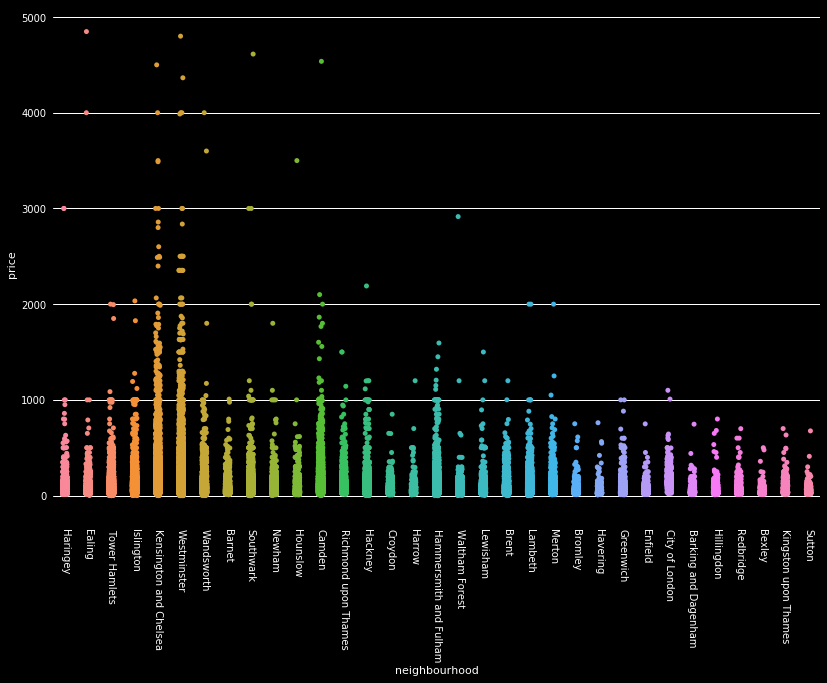

In [250]:
g = sns.catplot(x='neighbourhood', 
                y='price', 
                data=listings[listings['price']<5000], height=8, aspect=1.5)
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-90)

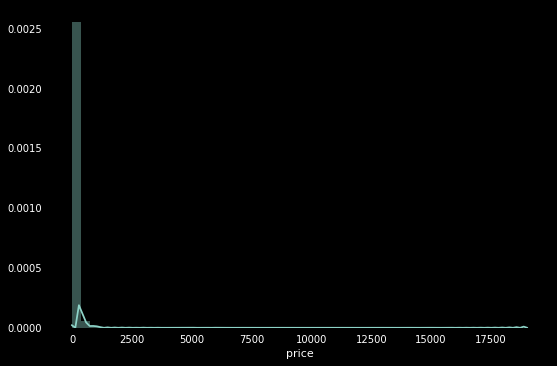

In [270]:
sns.distplot(listings['price'])
plt.grid(False)

We need to find a few fetaures to focus on from here, we can use calculate the correlation of the whole dataset with the target feature.
We Know the target feature has wild outliers so we shall be using a method less sensitive to outliers when calculating the correlations.

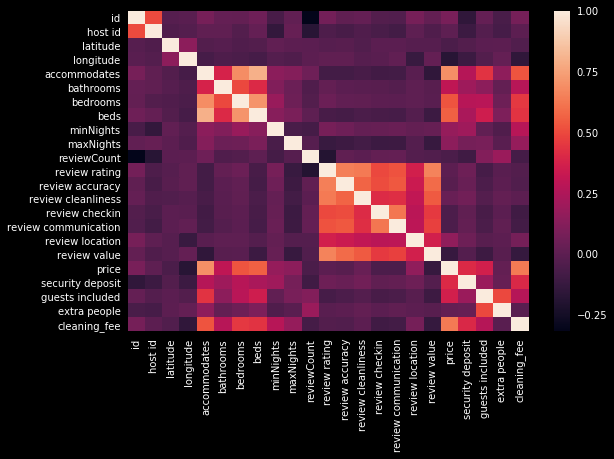

In [319]:
corr_matrix = listings.corr(method='spearman').fillna('median')
sns.heatmap(corr_matrix)

In [320]:
corr_matrix['price'].sort_values(ascending=False)

price                   1.000000
accommodates            0.691085
cleaning_fee            0.629125
beds                    0.560130
bedrooms                0.530984
security deposit        0.407316
guests included         0.365018
bathrooms               0.300155
minNights               0.170856
review location         0.159694
maxNights               0.147577
id                      0.083050
review cleanliness      0.034639
extra people            0.016121
host id                 0.001165
review rating          -0.003399
review accuracy        -0.019392
review communication   -0.054989
review checkin         -0.055096
latitude               -0.059142
reviewCount            -0.061283
review value           -0.127347
longitude              -0.175858
Name: price, dtype: float64

In [ ]:
# values of interest from the heatmap 
xprice =listings['accomodates', 'bathrooms', 'bedrooms','security deposit', 'cleaning fee', 'beds','guests inclueded', 'review location']

In [177]:
listings[ listings['first review'].dt.year >= 2018].head(3).T

,70,79,109
id,55402,62747,79488
last scraped,2019-03-07 00:00:00,2019-03-08 00:00:00,2019-03-08 00:00:00
listing url,https://www.airbnb.com/rooms/55402,https://www.airbnb.com/rooms/62747,https://www.airbnb.com/rooms/79488
name,"Modern 2 Bed 2 Bath, UK, Croydon",Beautiful huge double room in artist’s garden ...,Charming Apartment Amazing Location
host id,57861,289179,428080
experiences,none,none,none
neighbourhood,Croydon,Tower Hamlets,Westminster
latitude,51.3744,51.5213,51.5187
longitude,-0.1177,-0.05696,-0.16726
property type,Condominium,Apartment,Apartment


In [312]:
listings.groupby('neighbourhood')['price','review location'].median().sort_values(by='price',ascending= False)
#plt.title("Growth of AirBnB in London")
#plt.show()

,price,review location
neighbourhood,,
City of London,140.5,10.0
Kensington and Chelsea,140.0,10.0
Westminster,128.0,10.0
Camden,100.0,10.0
Hammersmith and Fulham,90.0,10.0
Islington,89.0,10.0
Richmond upon Thames,85.0,10.0
Wandsworth,80.0,10.0
Southwark,75.0,10.0


## Merging tables

We can solve some more interesting problems if we merge a few tables together. Let's see how review sentitment correlates with a listings overall ratings.

The reviews table contains a simplified summary of the reviews left for each property by month, characterised by a sentiment score and a word count.

In [ ]:
reviews = pd.read_csv(os.path.join(path,"Reviews.csv"))
reviews.head()

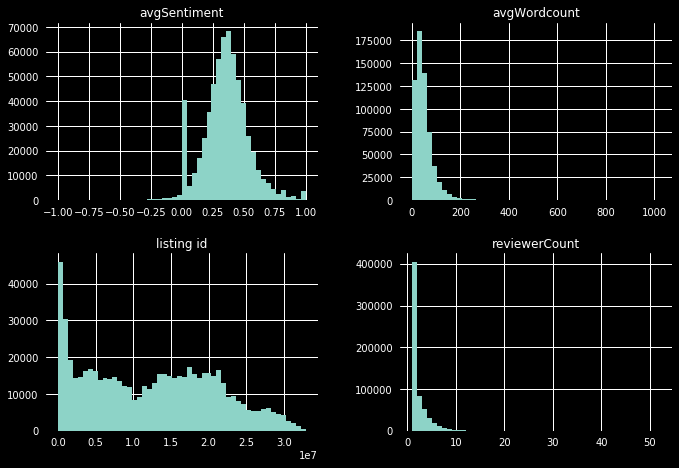

In [306]:
reviews.hist(bins = 50, figsize= (10,7))
#plt.grid(False)
plt.show()

Arguably the simplest visualisation of a single column is the histogram - group the data into bins and plot the number in each bin. Plotted this way, it is clear that most reviews are positive, though not overwhelmingly so:

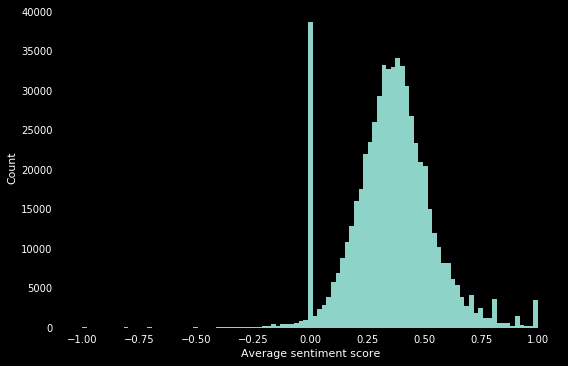

In [33]:
reviews['avgSentiment'].hist(bins = np.linspace(-1, 1, 100))
plt.xlabel('Average sentiment score')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Most reviews tend to be pretty short too, around 40 words long:

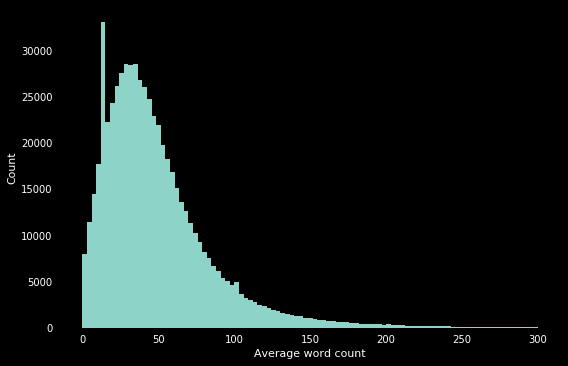

In [34]:
reviews['avgWordcount'].hist(bins = np.linspace(0, 300, 100))
plt.xlabel('Average word count')
plt.ylabel('Count')
plt.grid(False)
plt.show()

For now let's just take the median sentiment for each listing, so that the following table is *uniquely keyed* on the `listing id`, i.e. there is only one value for each `listing id`.

In [35]:
med_rvw = reviews.groupby('listing id')['avgSentiment'].median().reset_index()
med_rvw.head()

,listing id,avgSentiment
0,9554,0.376970
1,11076,0.727500
2,11417,0.272692
3,13913,0.337118
4,15400,0.394443


In this form, we are able to merge the `med_rvw` table onto the `listings` table. Merging is where we take two tables - a `left` and a `right`, and attach the `right` table onto the `left` table.

To match up the rows in the attached tables, pandas needs to know how to indentify each row - in this case we can use the id of each airbnb listing. This column is called `listing id` in `med_rvw`, and `id` in listings.

In the following cell, we extract the columns from `listings` we are interested in, and then call the `merge()` method. In this case, `left` is `listings` and `right` is `med_rvw`.

In [36]:
cols_to_keep = ['id','review rating','review accuracy', 'review cleanliness', 'review checkin',
                'review communication', 'review location', 'review value', 'neighbourhood']

merged = listings[cols_to_keep].merge(med_rvw, left_on = 'id', right_on = 'listing id', how = 'inner')
merged.head()

,id,review rating,review accuracy,review cleanliness,review checkin,review communication,review location,review value,neighbourhood,listing id,avgSentiment
0,9554,97.0,10.0,9.0,10.0,10.0,9.0,10.0,Haringey,9554,0.376970
1,11076,90.0,8.0,9.0,10.0,9.0,9.0,9.0,Ealing,11076,0.727500
2,11417,95.0,10.0,10.0,10.0,10.0,10.0,9.0,Tower Hamlets,11417,0.272692
3,13913,95.0,9.0,10.0,9.0,10.0,9.0,9.0,Islington,13913,0.337118
4,15400,95.0,10.0,10.0,10.0,10.0,10.0,9.0,Kensington and Chelsea,15400,0.394443


Now everything is matched up in one table, we can do fun things like look at the relationship between the actual review rating, and the sentiment of the review text:

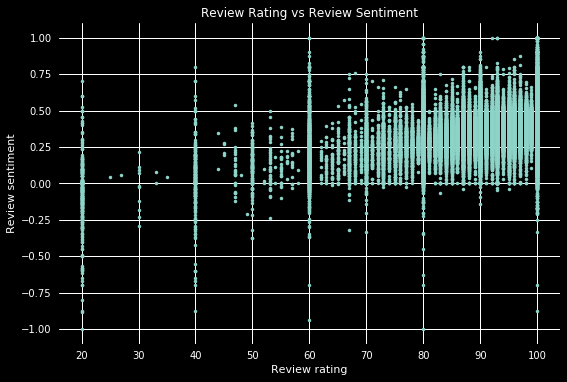

In [37]:
x = merged['review rating']
y = merged['avgSentiment']
# Drop pairs of (x, y) if either is NaN
x, y = list(zip(*[(x[i], y[i]) for i in range(len(x)) if np.isfinite(x[i]) and np.isfinite(y[i])]))

plt.plot(x, y, '.')
plt.title("Review Rating vs Review Sentiment")
plt.xlabel('Review rating')
plt.ylabel('Review sentiment')
plt.show()

As there are lots of points and they all overlap, often a better way of plotting dense data is to create a 2D histogram and plot the density of points. In this way we see better the overrepresentation of review ratings at 20 / 40 / 60 / 80 / 100%, and review sentiments of zero.

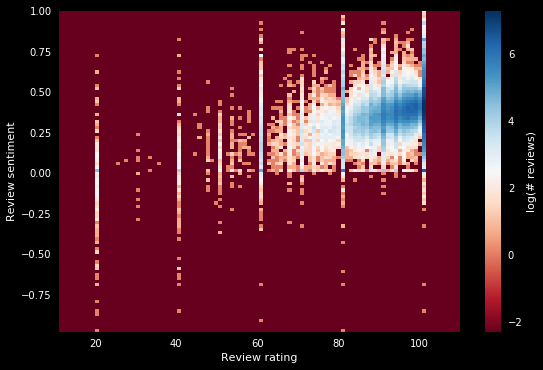

In [38]:
xbins = np.linspace(10, 110, 100)
ybins = np.linspace(-1, 1, 100)
hist2d, xe, ye = np.histogram2d(x,y, bins=(xbins, ybins))
plt.pcolormesh(xe[1:], ye[1:], np.log(hist2d.T + 0.1),cmap=plt.get_cmap('RdBu')) # Offset to avoid log(0)
plt.xlabel('Review rating')
plt.ylabel('Review sentiment')
plt.colorbar(label='log(# reviews)')
plt.show()

## Challenge: Which borough has the highest average location score? Lowest?

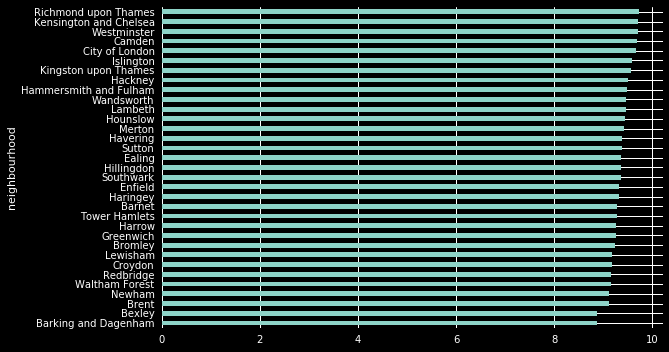

In [54]:
merged.groupby('neighbourhood')['review location'].mean().sort_values(ascending= True).plot('barh')

In [41]:
merged.pivot_table(index = ['neighbourhood'], values =['review location'], aggfunc = [np.median ,np.mean, len] )


,median,mean,len
,review location,review location,review location
neighbourhood,,,
Barking and Dagenham,9.0,8.867725,203.0
Barnet,10.0,9.289759,1253.0
Bexley,9.0,8.873563,186.0
Brent,9.0,9.116246,2217.0
Bromley,10.0,9.243852,504.0
Camden,10.0,9.688172,5624.0
City of London,10.0,9.675294,436.0
Croydon,9.0,9.184874,878.0


## Challenge: Does housing price correlate with airbnb price? popularity?

In [42]:
# Solution here...

In [43]:
calendar.head()

,listing id,mon_yr,days available,meanPrice,maxPrice,minPrice
0,9554,01-2019,31,36.03,39.0,35.0
1,9554,02-2019,28,36.14,39.0,35.0
2,9554,03-2019,31,36.29,39.0,35.0
3,9554,04-2018,0,NaN,NaN,NaN
4,9554,04-2019,7,36.14,39.0,35.0


In [44]:
calendar['id'] = calendar['listing id']

In [45]:
calendar =calendar.drop(columns=['listing id'] )
calendar = calendar.set_index('id')

In [324]:
print(calendar.shape, listings.shape)

(1853374, 6) (103546, 36)


In [46]:
merger = pd.merge(calendar, listings, on= 'id')

In [317]:
merger.head(2).T

,0,1
id,9554,9554
mon_yr,01-2019,02-2019
days available,31,28
meanPrice,36.03,36.14
maxPrice,39,39
minPrice,35,35
last scraped,2018-04-08 00:00:00,2018-04-08 00:00:00
listing url,https://www.airbnb.com/rooms/9554,https://www.airbnb.com/rooms/9554
name,"Cozy, 3 minutes to Piccadilly Line","Cozy, 3 minutes to Piccadilly Line"
host id,31655,31655


In [316]:
merger.isnull().sum() / len(merger) * 100 

id                           0.000000
mon_yr                       0.000000
days available               0.000000
meanPrice                   24.816686
maxPrice                    24.816686
minPrice                    24.816686
last scraped                 0.000000
listing url                  0.000000
name                         0.042085
host id                      0.000000
experiences                  0.000000
neighbourhood                0.000000
latitude                     0.000000
longitude                    0.000000
property type                0.000000
room type                    0.000000
accommodates                 0.000000
bathrooms                    0.236164
bedrooms                     0.059351
beds                         0.174439
bed type                     0.000000
minNights                    0.000000
maxNights                    0.000000
reviewCount                  0.000000
instant bookable             0.000000
is business travel ready     0.000000
cancellation